# COVID-19

This example uses the 'covid19' dataset to predict the number of deaths and cases one day in advance. You can download the Jupyter Notebook of the study <a href="covid19.ipynb">here</a>.

<ul class="ul_content">
    <li><b>date: </b>Date of the record</li>
    <li><b>cases: </b>Number of people infected</li>
    <li><b>deaths: </b>Number of deaths</li>
    <li><b>state: </b>State</li>
    <li><b>fips: </b>The Federal Information Processing Standards (FIPS) code for the county.</li>
    <li><b>county: </b>County</li>
</ul>

We will follow the data science cycle (Data Exploration - Data Preparation - Data Modeling - Model Evaluation - Model Deployment) to solve this problem.

## Initialization

This example uses the following version of VerticaPy:

In [1]:
import verticapy as vp
vp.__version__

'0.9.0'

Connect to Vertica. This example uses an existing connection called "VerticaDSN." For details on how to create a connection, use see the <a href="../../connection.php">connection tutorial</a>.

In [2]:
vp.connect("VerticaDSN")

Let's create a Virtual DataFrame of the dataset. The dataset is available <a href="../../data/covid19_deaths.csv">here</a>.

,📅dateDate,AbccountyVarchar(66),AbcstateVarchar(48),123fipsInt,123casesInt,123deathsInt
1,2020-01-21,Snohomish,Washington,53061,1,0
2,2020-01-22,Snohomish,Washington,53061,1,0
3,2020-01-23,Snohomish,Washington,53061,1,0
4,2020-01-24,Cook,Illinois,17031,1,0
5,2020-01-24,Snohomish,Washington,53061,1,0
6,2020-01-25,Cook,Illinois,17031,1,0
7,2020-01-25,Orange,California,6059,1,0
8,2020-01-25,Snohomish,Washington,53061,1,0
9,2020-01-26,Cook,Illinois,17031,1,0
10,2020-01-26,Los Angeles,California,6037,1,0

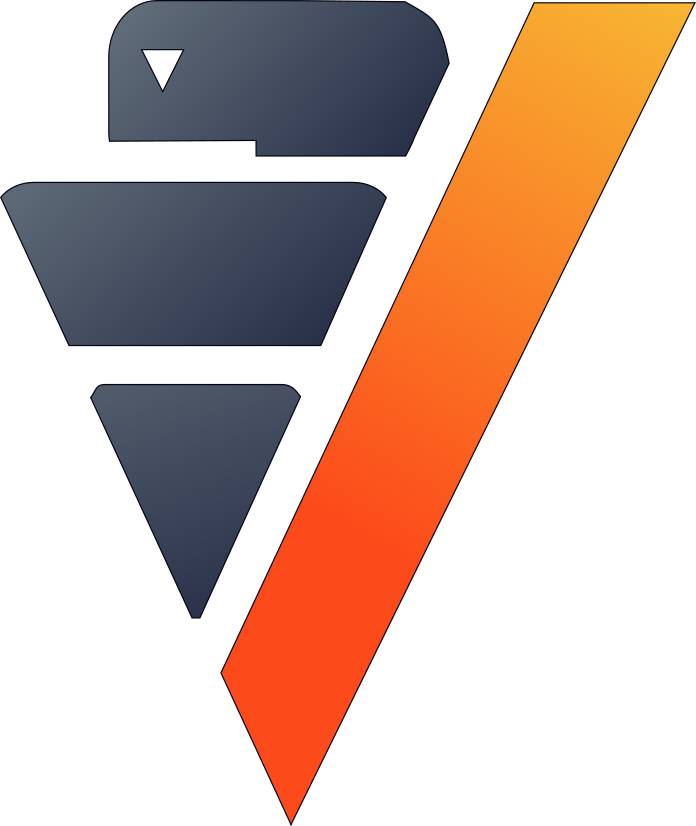

In [3]:
covid19 = vp.read_csv("data/covid19_deaths.csv")
display(covid19)

## Data Exploration and Preparation

Let's explore the data by displaying descriptive statistics of all the columns.

,dtype,count,top,top_percent,unique
"""date""",date,128256,2020-05-09,2.247,110.0
"""county""",varchar(66),128256,Washington,1.163,1710.0
"""state""",varchar(48),128256,Texas,6.71,51.0
"""fips""",int,128256,53061,0.086,2882.0
"""cases""",int,128256,1,13.376,3830.0
"""deaths""",int,128256,0,61.125,806.0

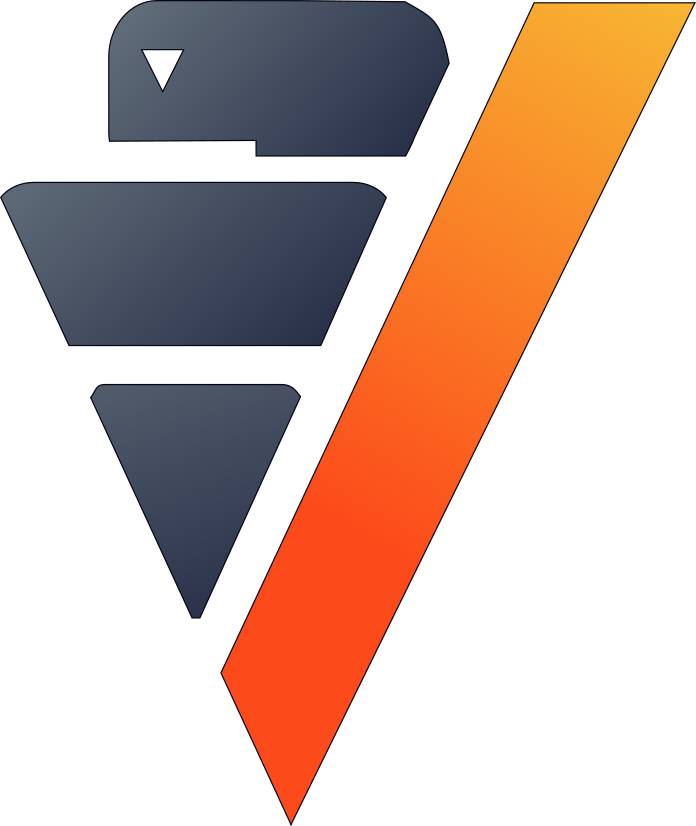

In [5]:
covid19.describe(method = "categorical", unique = True)

We have data from January 2020 to the beginning of May.

,value
name,"""date"""
dtype,date
count,128256
min,2020-01-21
max,2020-05-09

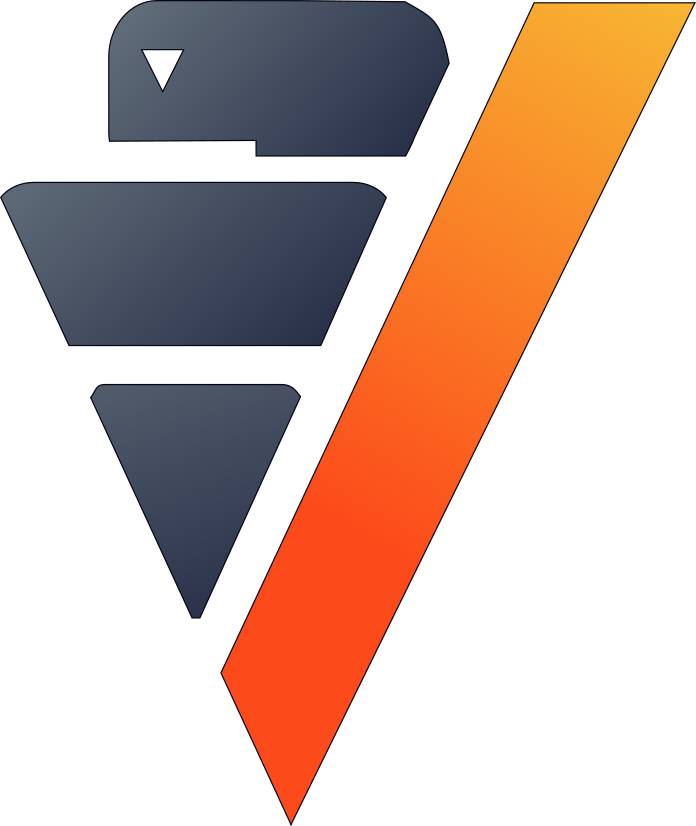

In [6]:
covid19["date"].describe()

We'll try to predict the number of future deaths by using the statistics from previous days. We can drop the columns 'county' and 'fips,' since the scope of our analysis is focused on the United States and the FIPS code isn't relevant to our predictions.

,📅dateDate,AbcstateVarchar(48),123casesInt,123deathsInt
1,2020-01-21,Washington,1,0
2,2020-01-22,Washington,1,0
3,2020-01-23,Washington,1,0
4,2020-01-24,Illinois,1,0
5,2020-01-24,Washington,1,0
6,2020-01-25,Illinois,1,0
7,2020-01-25,California,1,0
8,2020-01-25,Washington,1,0
9,2020-01-26,Illinois,1,0
10,2020-01-26,California,1,0

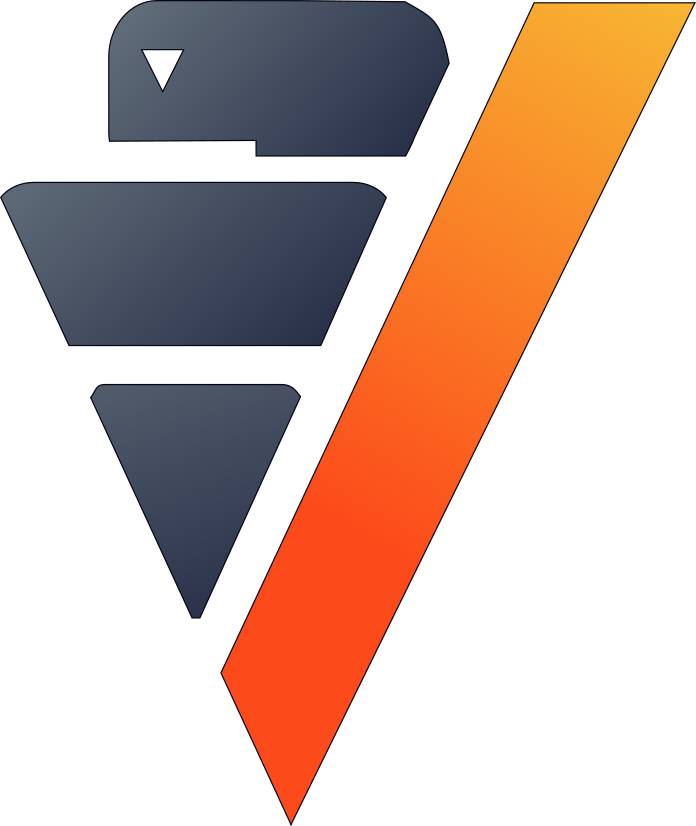

In [7]:
covid19.drop(["fips", "county"])

Let's sum the number of deaths and cases by state and date.

,AbcstateVarchar(48),📅dateDate,123deathsInteger,123casesInteger
1,South Carolina,2020-03-20,3,126
2,South Carolina,2020-04-04,40,1917
3,South Carolina,2020-04-03,34,1700
4,South Carolina,2020-04-02,31,1554
5,South Carolina,2020-04-08,63,2552
6,South Carolina,2020-04-20,124,4439
7,South Carolina,2020-04-19,120,4377
8,South Carolina,2020-04-18,119,4246
9,South Carolina,2020-04-17,116,4086
10,South Carolina,2020-04-16,109,3931

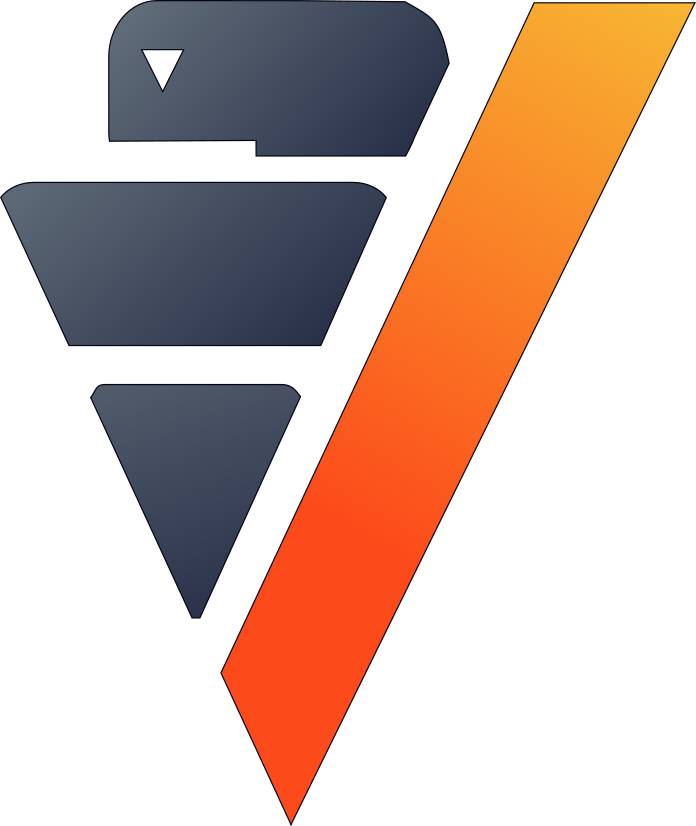

In [8]:
import verticapy.stats as st
covid19 = covid19.groupby(["state",
                           "date"],
                          [st.sum(covid19["deaths"])._as("deaths"),
                           st.sum(covid19["cases"])._as("cases")])
display(covid19)

Let's look at the autocorrelation graphic of the number of deaths.

,value,confidence
0,1.0,0.03306808277915286
1,0.999,0.05724557037333314
2,0.998,0.07387480270409284
3,0.997,0.08737730395335205
4,0.995,0.09901827142968875
5,0.992,0.10937378440149341
6,0.989,0.11878064860034902
7,0.985,0.12743226263766533
8,0.981,0.13547360751434442
9,0.975,0.14297793284551047

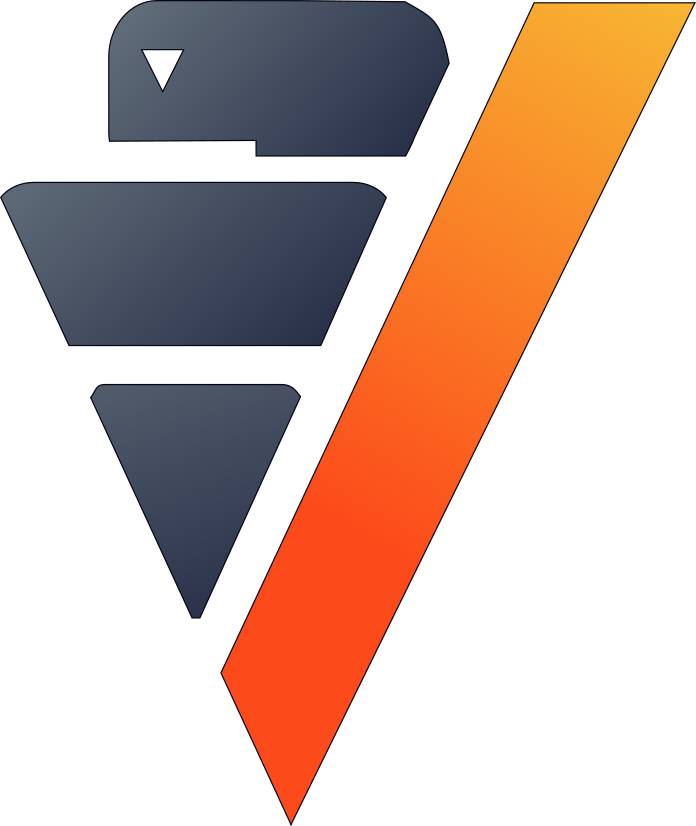

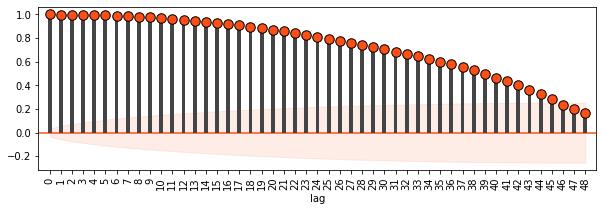

In [9]:
%matplotlib inline
covid19.acf(column = "deaths", 
            ts = "date",
            by = ["state"],
            p = 48)

The process doesn't seem to be stationary. Let's use a Dickey-Fuller test to confirm our hypothesis.

,value
ADF Test Statistic,-0.9916599727457468
p_value,0.321448022269228
# Lags used,12
# Observations Used,3513
Critical Value (1%),-3.43
Critical Value (2.5%),-3.12
Critical Value (5%),-2.86
Critical Value (10%),-2.57
Stationarity (alpha = 1%),❌

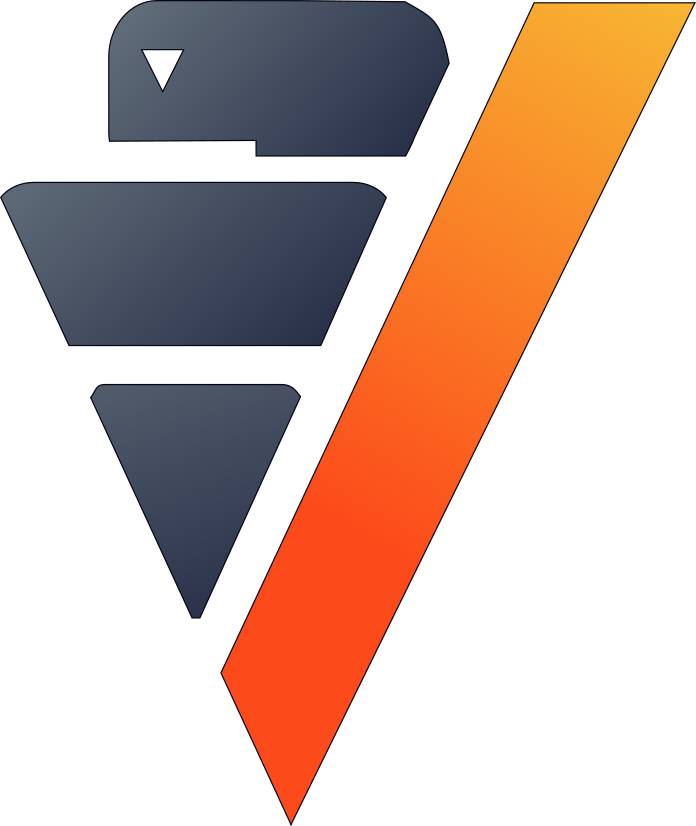

In [10]:
from verticapy.stats import adfuller
adfuller(covid19,
         ts = "date", 
         column = "deaths", 
         by = ["state"], 
         p = 12)

We can look at the cumulative number of deaths and its exponentiality.

<AxesSubplot:xlabel='"date"', ylabel='"deaths"'>

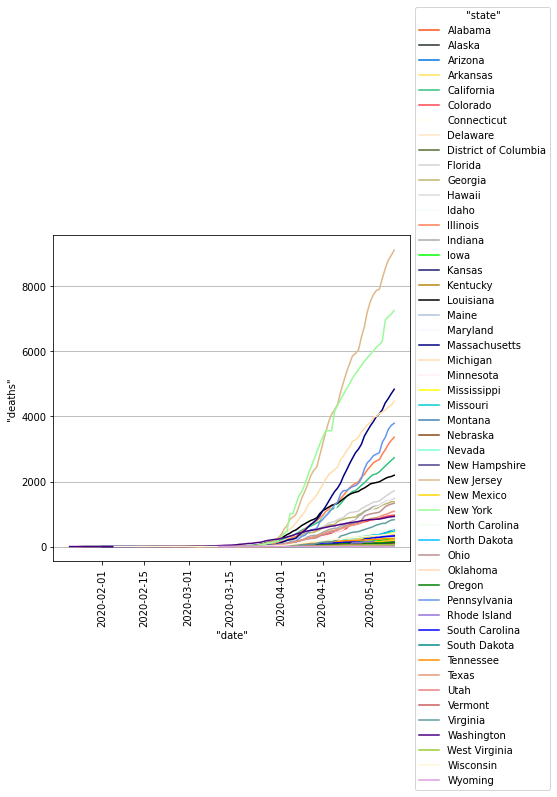

In [11]:
covid19["deaths"].plot(ts = "date", 
                       by = "state")

Let's plot this for the entire country.

<AxesSubplot:xlabel='"date"', ylabel='"deaths"'>

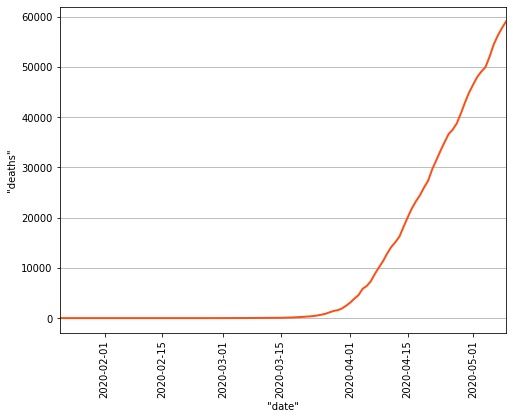

In [12]:
covid = covid19.groupby(["date"], [st.sum(covid19["deaths"])._as("deaths")])
covid["deaths"].plot(ts = "date")

As you would expect, there's a clear correlation between the number of people infected and the number of deaths.

In [13]:
covid19.corr(["deaths", "cases"])

0.954246238080928

A vector autoregression (VAR) model can be very good to do the predictions. But first, let's encode the states to look at their influence.

,AbcstateVarchar(48),📅dateDate,123deathsInteger,123casesInteger,123state_AlabamaBool,123state_AlaskaBool,123state_ArizonaBool,123state_ArkansasBool,123state_CaliforniaBool,123state_ColoradoBool,123state_ConnecticutBool,123state_DelawareBool,123state_District_of_ColumbiaBool,123state_FloridaBool,123state_GeorgiaBool,123state_HawaiiBool,123state_IdahoBool,123state_IllinoisBool,123state_IndianaBool,123state_IowaBool,123state_KansasBool,123state_KentuckyBool,123state_LouisianaBool,123state_MaineBool,123state_MarylandBool,...,123state_MissouriBool,123state_MontanaBool,123state_NebraskaBool,123state_NevadaBool,123state_New_HampshireBool,123state_New_JerseyBool,123state_New_MexicoBool,123state_New_YorkBool,123state_North_CarolinaBool,123state_North_DakotaBool,123state_OhioBool,123state_OklahomaBool,123state_OregonBool,123state_PennsylvaniaBool,123state_Rhode_IslandBool,123state_South_CarolinaBool,123state_South_DakotaBool,123state_TennesseeBool,123state_TexasBool,123state_UtahBool,123state_VermontBool,123state_VirginiaBool,123state_WashingtonBool,123state_West_VirginiaBool,123state_WisconsinBool
1,South Carolina,2020-03-20,3,126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,South Carolina,2020-04-04,40,1917,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,South Carolina,2020-04-03,34,1700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,South Carolina,2020-04-02,31,1554,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,South Carolina,2020-04-08,63,2552,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,South Carolina,2020-04-20,124,4439,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,South Carolina,2020-04-19,120,4377,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,South Carolina,2020-04-18,119,4246,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,South Carolina,2020-04-17,116,4086,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10,South Carolina,2020-04-16,109,3931,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0

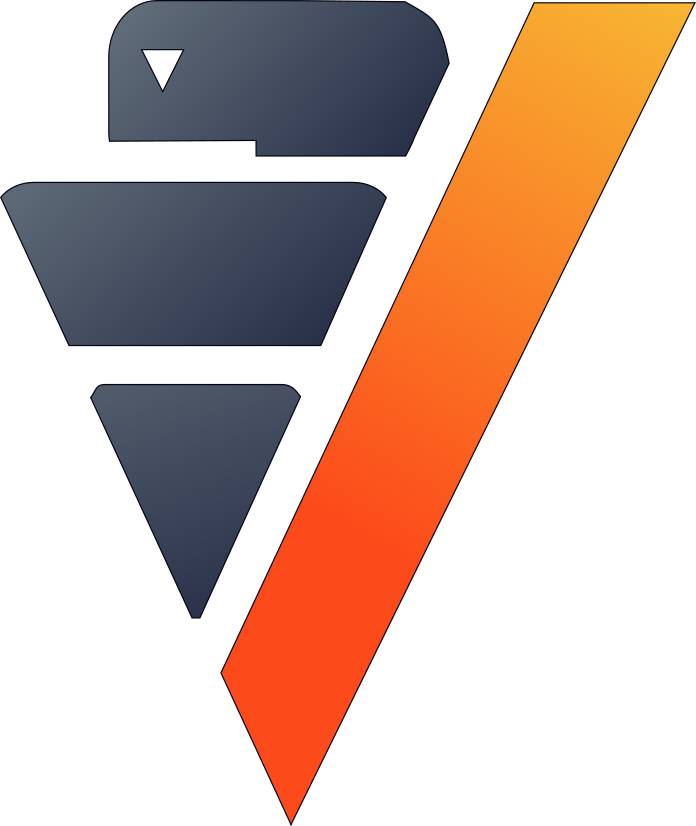

In [14]:
covid19["state"].one_hot_encode()

Because of the upward monotonic trend, we can also look at the correlation between the days elapsed and the number of cases.

In [15]:
covid19["elapsed_days"] = covid19["date"] - st.min(covid19["date"])._over(by = [covid19["state"]])

We can generate the SQL code of the vDataFrame to see what happens behind the scenes when we modify our data from within the vDataFrame.

In [16]:
print(covid19.current_relation())

(
   SELECT
     "state",
     "date",
     "deaths",
     "cases",
     DECODE("state_Alabama", 'Alabama', 1, 0) AS "state_Alabama",
     DECODE("state_Alaska", 'Alaska', 1, 0) AS "state_Alaska",
     DECODE("state_Arizona", 'Arizona', 1, 0) AS "state_Arizona",
     DECODE("state_Arkansas", 'Arkansas', 1, 0) AS "state_Arkansas",
     DECODE("state_California", 'California', 1, 0) AS "state_California",
     DECODE("state_Colorado", 'Colorado', 1, 0) AS "state_Colorado",
     DECODE("state_Connecticut", 'Connecticut', 1, 0) AS "state_Connecticut",
     DECODE("state_Delaware", 'Delaware', 1, 0) AS "state_Delaware",
     DECODE("state_District_of_Columbia", 'District of Columbia', 1, 0) AS "state_District_of_Columbia",
     DECODE("state_Florida", 'Florida', 1, 0) AS "state_Florida",
     DECODE("state_Georgia", 'Georgia', 1, 0) AS "state_Georgia",
     DECODE("state_Hawaii", 'Hawaii', 1, 0) AS "state_Hawaii",
     DECODE("state_Idaho", 'Idaho', 1, 0) AS "state_Idaho",
     DECODE("stat

The vDataFrame memorizes all of our operations on the data to dynamically generate the correct SQL statement and passes computation and aggregation to Vertica.

Let's see the correlation between the number of deaths and the other variables.

,"""deaths"""
"""deaths""",1.0
"""cases""",0.954246238080928
"""elapsed_days""",0.388
"""state_New_Jersey""",0.362
"""state_New_York""",0.313
"""state_Michigan""",0.187
"""state_Massachusetts""",0.094
"""state_Pennsylvania""",0.091
"""state_Connecticut""",0.079
"""state_Louisiana""",0.076

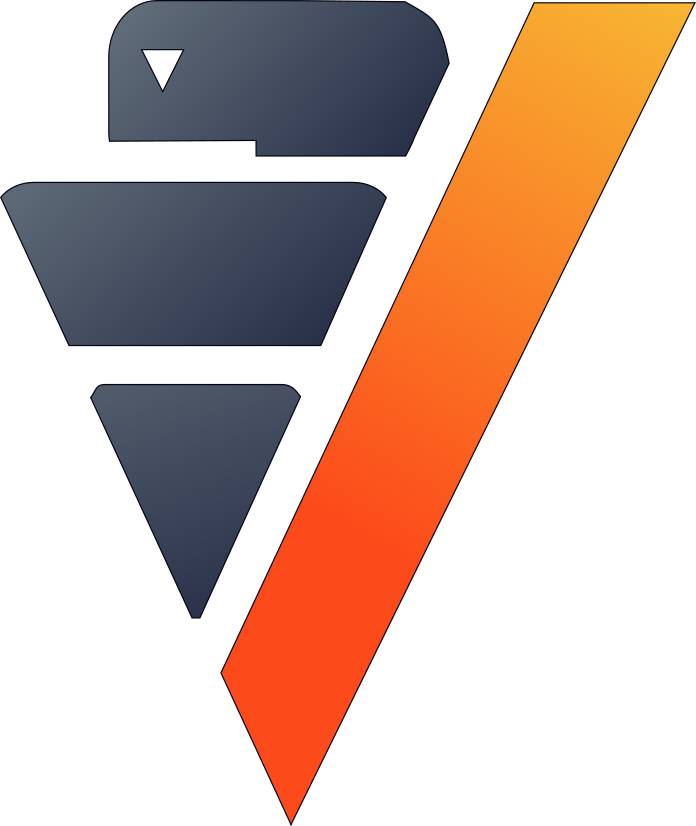

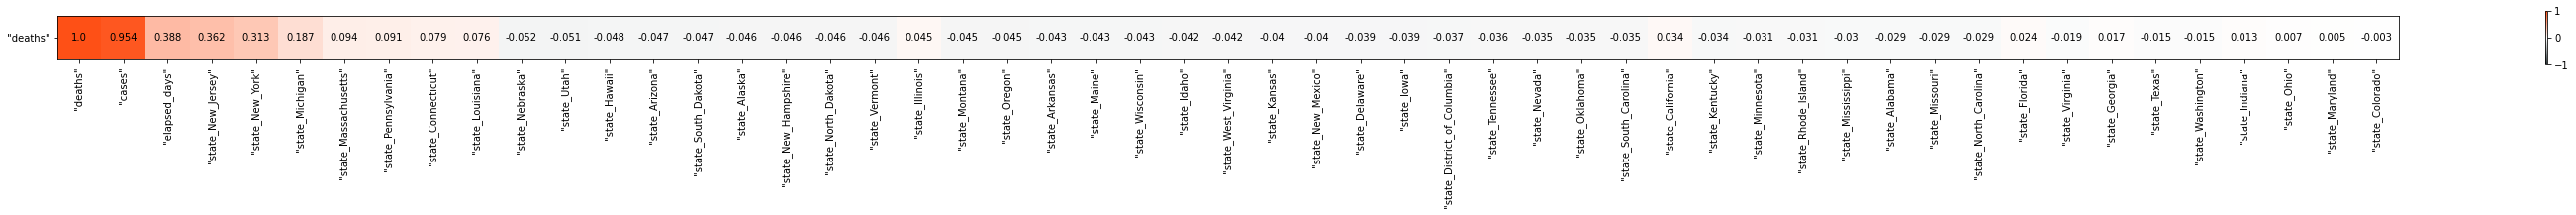

In [17]:
covid19.corr(focus = "deaths")

We can see clearly a high correlation for some variables. We can use them to compute a SARIMAX model, but we'll stick to a VAR model for this study.

Let's compute the total number of deaths and cases to create our VAR model.

In [20]:
covid19 = vp.read_csv("data/covid19_deaths.csv").groupby(["date"],
                                                         [st.sum(covid19["deaths"])._as("deaths"),
                                                          st.sum(covid19["cases"])._as("cases")])

## Machine Learning

Let's create a VAR model to predict the number of COVID-19 deaths and cases in the USA.

,r2
"""deaths""",0.999946612854075
"""cases""",0.999981436848316

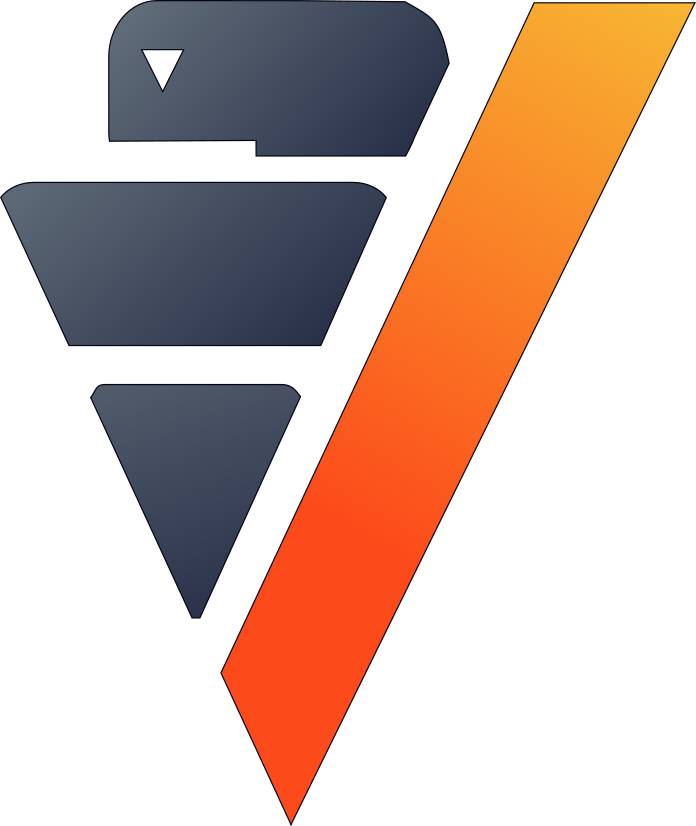

In [21]:
from verticapy.learn.tsa import VAR
model = VAR("covid19_var", p = 6)
model.fit(covid19,
          X = ["deaths", "cases"],
          ts = "date")
model.score()

Our model is excellent. Let's predict the number of deaths in a near future.

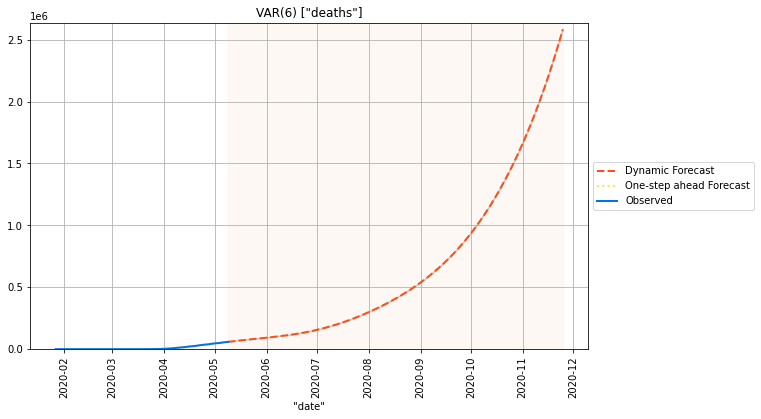

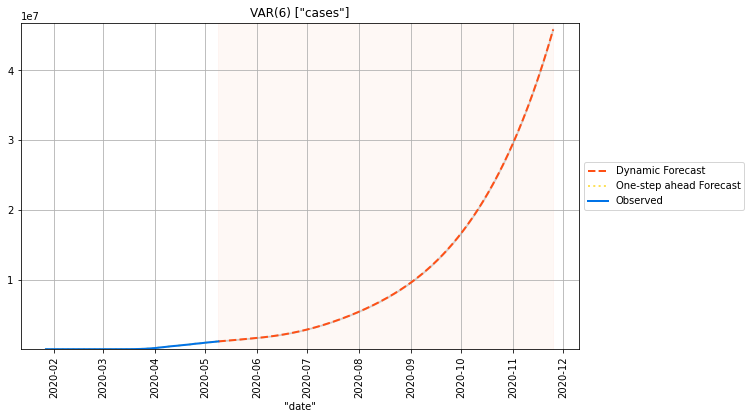

In [22]:
for i in range(2):
    x = model.plot(covid19,
                   nlead = 200,
                   X_idx = i,
                   dynamic = True)

Let's add the prediction in the vDataFrame.

,📅dateDate,123deathsInteger,123casesInteger,"123VAR_deathsNumeric(35,17)","123VAR_casesNumeric(36,17)"
1,2020-01-21,0,1,[null],[null]
2,2020-01-22,0,1,[null],[null]
3,2020-01-23,0,1,[null],[null]
4,2020-01-24,0,2,[null],[null]
5,2020-01-25,0,3,[null],[null]
6,2020-01-26,0,5,[null],[null]
7,2020-01-27,0,5,1.5513081438073502,281.6250293569983
8,2020-01-28,0,5,1.4395350571570902,279.67333224964005
9,2020-01-29,0,5,1.537041024411937,279.98218450553884
10,2020-01-30,0,6,1.6386449021789846,280.1730927134462

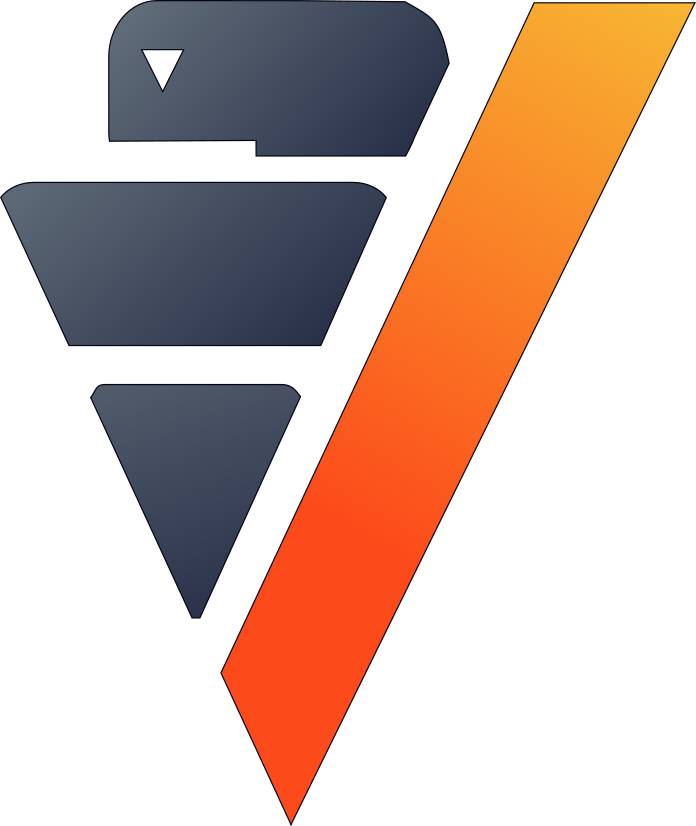

In [23]:
covid19 = model.predict(covid19)
display(covid19)

Let's impute the missing values due to the lags computations by 0 and round the negative predictions to 0.

In [24]:
covid19["VAR_deaths"].fillna(val = 0)
covid19["VAR_deaths"] = st.case_when(covid19["VAR_deaths"] < 0, 0, covid19["VAR_deaths"])
covid19["VAR_cases"].fillna(val = 0)
covid19["VAR_cases"] = st.case_when(covid19["VAR_cases"] < 0, 0, covid19["VAR_cases"])

6 elements were filled.
6 elements were filled.


Let's compute our new R2.

In [25]:
covid19.score(y_score = "cases",
              y_true = "VAR_cases",
              method = "r2")

0.999981928425924

In [26]:
covid19.score(y_score = "deaths",
              y_true = "VAR_deaths",
              method = "r2")

0.999947730144449

Let's draw the time series plot.

<AxesSubplot:xlabel='"date"'>

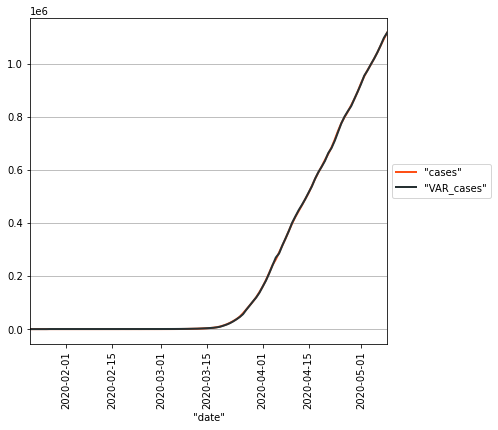

In [27]:
covid19.plot(ts = "date", 
             columns = ["cases", "VAR_cases"])

<AxesSubplot:xlabel='"date"'>

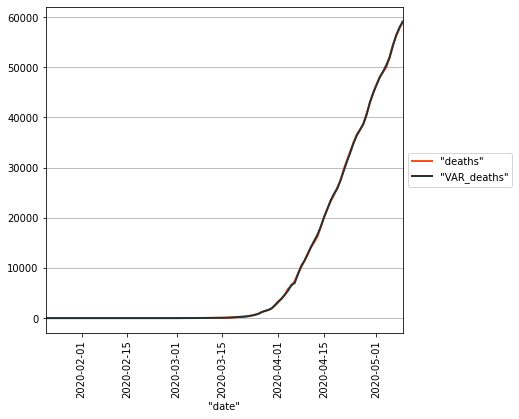

In [28]:
covid19.plot(ts = "date", 
             columns = ["deaths", "VAR_deaths"])

Fantastic: our prediction seems to follow the trend! 

## Conclusion

We've solved our problem in a Pandas-like way, all without ever loading data into memory!